In [3]:
import pandas as pd



from google.colab import drive
drive.mount('/content/drive')

# Load the uploaded datasets
energy_data = pd.read_csv('/content/drive/MyDrive/energydataset.csv')
weather_data = pd.read_csv('/content/drive/MyDrive/weaherdataset.csv')
weather_df = pd.read_csv('/content/drive/MyDrive/weaherdataset.csv')
energy_df = pd.read_csv('/content/drive/MyDrive/energydataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Step 2: Convert datetime columns to datetime type
energy_df['time'] = pd.to_datetime(energy_df['time'], utc=True)
weather_df['dt_iso'] = pd.to_datetime(weather_df['dt_iso'], utc=True)


In [5]:
# Step 3: Check for missing values and handle them
print("Missing values in weather_df:")
print(weather_df.isnull().sum())

print("\nMissing values in energy_df:")
print(energy_df.isnull().sum())

Missing values in weather_df:
dt_iso                 0
city_name              0
temp                   0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
rain_3h                0
snow_3h                0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
weather_icon           0
dtype: int64

Missing values in energy_df:
time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal    

In [6]:
# Forward-fill missing values
weather_df.ffill(inplace=True)
energy_df.ffill(inplace=True)


In [8]:
!pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import StandardScaler # Import StandardScaler from sklearn.preprocessing

# ... (rest of your code) ...

# Step 4: Normalize specific numerical columns
scaler = StandardScaler()
energy_df[['total load actual', 'price actual']] = scaler.fit_transform(
    energy_df[['total load actual', 'price actual']]
)

In [9]:
# Step 5: Add time-based features
energy_df['hour'] = energy_df['time'].dt.hour
energy_df['day_of_week'] = energy_df['time'].dt.dayofweek
energy_df['month'] = energy_df['time'].dt.month

In [10]:
# Step 6: Add lag and rolling features
energy_df['demand_lag_1'] = energy_df['total load actual'].shift(1)
energy_df['demand_lag_24'] = energy_df['total load actual'].shift(24)
energy_df['demand_rolling_24'] = energy_df['total load actual'].rolling(window=24).mean()

In [11]:
# Drop rows with NaNs generated by lagging and rolling
energy_df.dropna(inplace=True)

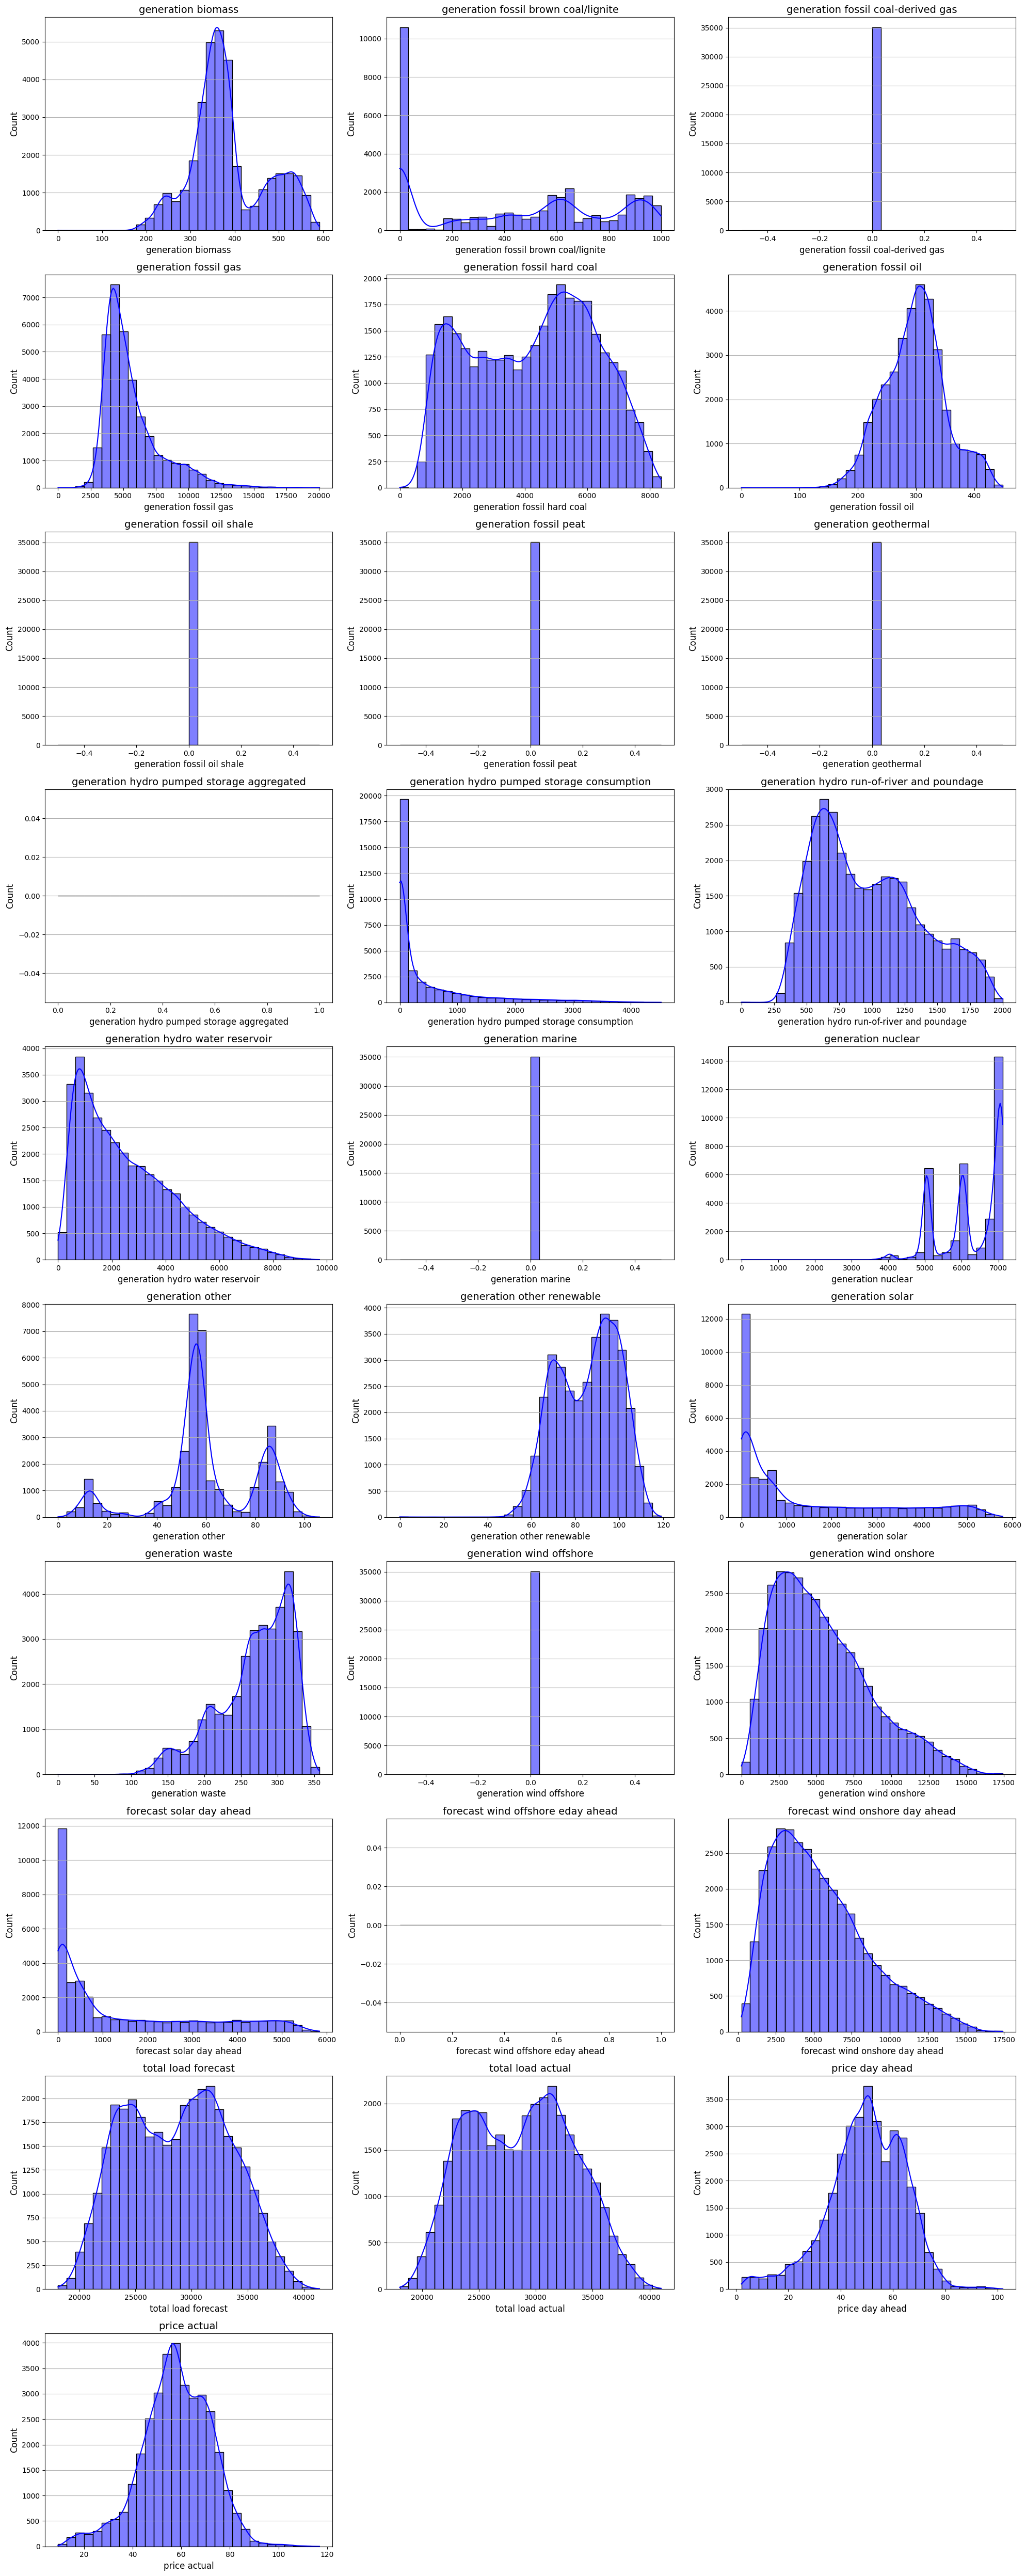

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the number of rows and columns for subplots
num_cols = energy_data.select_dtypes(include=np.number).shape[1]
num_rows = (num_cols + 2) // 3  # Adjust rows dynamically for all columns

# Adjust figure size dynamically
plt.figure(figsize=(20, num_rows * 5))  # Each row gets more space for clarity

# Loop through numerical columns and plot histograms
for i, col in enumerate(energy_data.select_dtypes(include=np.number).columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(energy_data[col], kde=True, color='blue', bins=30)
    plt.title(col, fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(axis='y')  # Add grid for better readability

plt.tight_layout()
plt.show()


In [13]:
# Step 7: Time-based train-test split
train_size = int(len(energy_df) * 0.8)
train_data = energy_df[:train_size]
test_data = energy_df[train_size:]

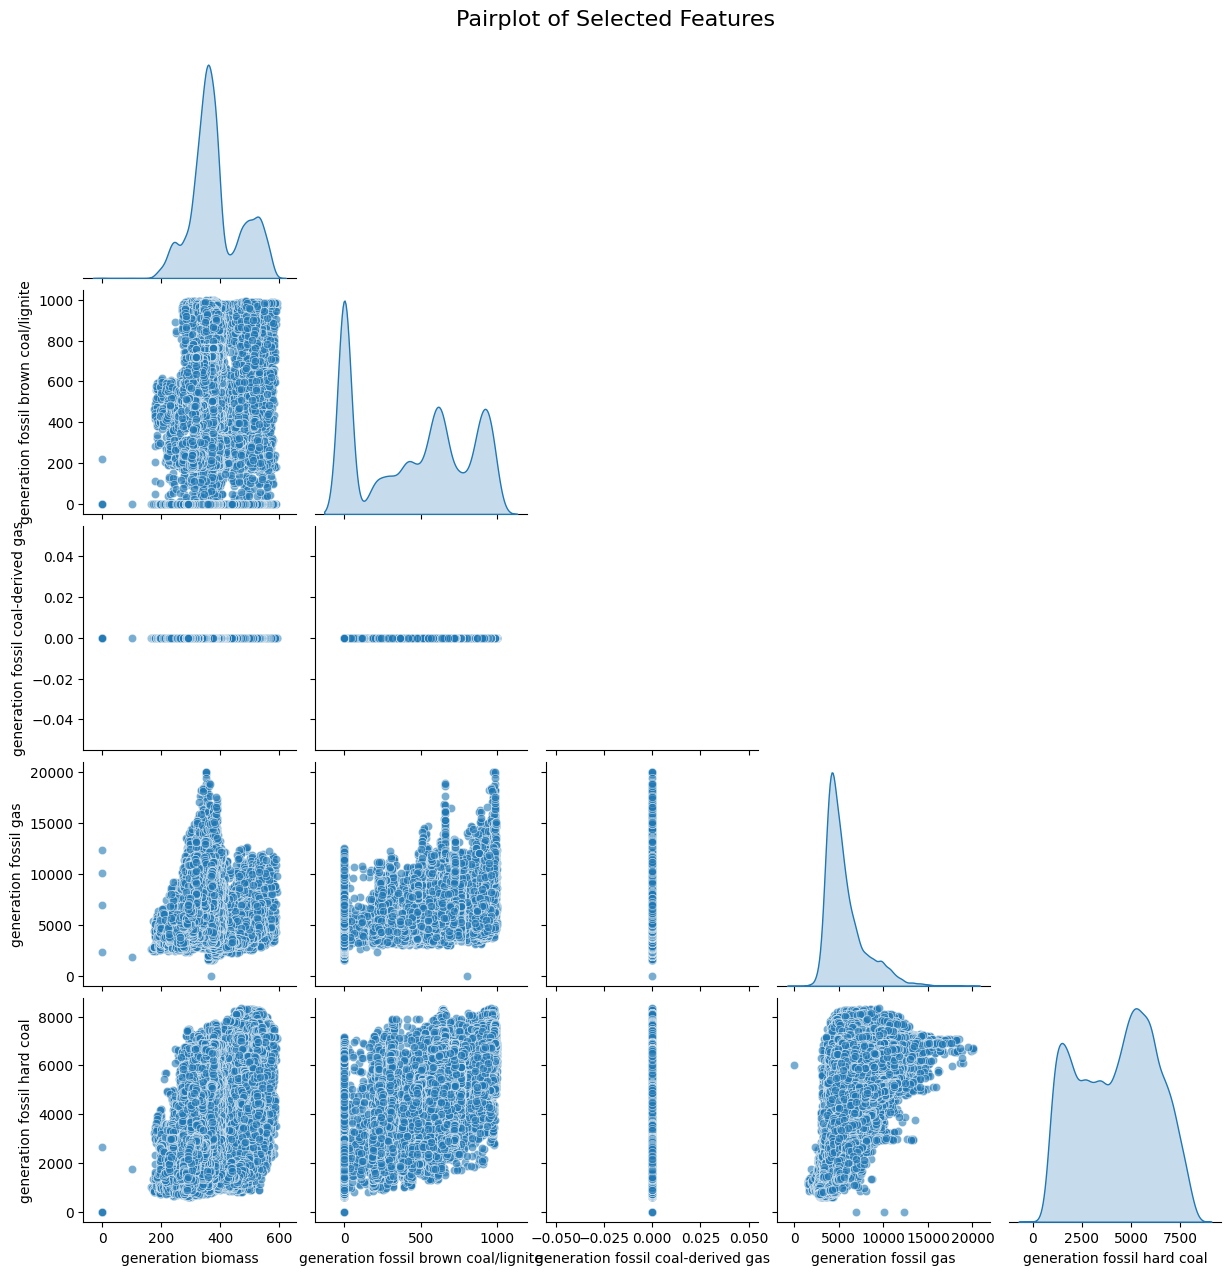

In [15]:
# Limit to first 5 numerical columns to avoid overcrowding
selected_cols = energy_data.select_dtypes(include=np.number).columns[:5]

# Pairplot with KDE for diagonal
sns.pairplot(energy_data[selected_cols], diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle("Pairplot of Selected Features", y=1.02, fontsize=16)
plt.show()


In [17]:
# Step 1: Check the initial shape of the data
print("Initial Shape of Energy Data:", energy_df.shape)

# Step 2: Check missing values before handling them
print("\nMissing values in Energy Data before filling:")
print(energy_df.isnull().sum())

# Handle missing values
energy_df.ffill(inplace=True)

# Step 3: After filling, check for missing values again
print("\nMissing values in Energy Data after filling:")
print(energy_df.isnull().sum())

# Step 4: Add time-based features (hour, day_of_week, month)
energy_df['hour'] = energy_df['time'].dt.hour
energy_df['day_of_week'] = energy_df['time'].dt.dayofweek
energy_df['month'] = energy_df['time'].dt.month

# Step 5: Add lag and rolling features
energy_df['demand_lag_1'] = energy_df['total load actual'].shift(1)
energy_df['demand_lag_24'] = energy_df['total load actual'].shift(24)
energy_df['demand_rolling_24'] = energy_df['total load actual'].rolling(window=24).mean()

# Step 6: Check the shape after feature engineering (before dropping NaNs)
print("\nShape after feature engineering:", energy_df.shape)

# Drop rows with NaNs generated by lagging and rolling
energy_df.dropna(inplace=True)

# Step 7: Check the final shape after dropping NaNs
print("\nShape after dropping NaNs:", energy_df.shape)

# Step 8: Time-based train-test split
train_size = int(len(energy_df) * 0.8)
train_data = energy_df[:train_size]
test_data = energy_df[train_size:]

# Step 9: Display cleaned data preview
print("\nCleaned Energy Data:")
print(energy_df.head())



Initial Shape of Energy Data: (0, 35)

Missing values in Energy Data before filling:
time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage aggregated     0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                 

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
energy_df = pd.read_csv('/content/drive/MyDrive/energydataset.csv')

# Step 2: Inspect the dataset to ensure it's loaded correctly
print("First few rows of Energy Data:")
print(energy_df.head())

# Check the shape of the dataset
print("\nShape of Energy Data:", energy_df.shape)

# Check the column names to ensure they match expected names
print("\nColumns in Energy Data:")
print(energy_df.columns)

# Check the data types of each column to ensure proper loading
print("\nData Types of Columns:")
print(energy_df.dtypes)

# Step 3: Check for missing values
print("\nMissing values in Energy Data before filling:")
print(energy_df.isnull().sum())

# Step 4: Handle missing values more carefully
# For columns like 'generation hydro pumped storage aggregated' with all NaNs, fill with 0 or drop the column
energy_df['generation hydro pumped storage aggregated'].fillna(0, inplace=True)

# For 'forecast wind offshore eday ahead', since it has all NaNs, we can drop this column if it's not useful
energy_df.drop(columns=['forecast wind offshore eday ahead'], inplace=True)

# For other columns, we can use forward filling
energy_df.ffill(inplace=True)

# Step 5: Check missing values again after filling
print("\nMissing values in Energy Data after filling:")
print(energy_df.isnull().sum())

# Step 6: Ensure 'time' column is in datetime format (if applicable)
if 'time' in energy_df.columns:
    energy_df['time'] = pd.to_datetime(energy_df['time'], errors='coerce', utc=True)  # 'coerce' to handle invalid formats

# Step 7: Feature Engineering
# Adding time-based features (hour, day of the week, month)
if 'time' in energy_df.columns:
    energy_df['hour'] = energy_df['time'].dt.hour
    energy_df['day_of_week'] = energy_df['time'].dt.dayofweek
    energy_df['month'] = energy_df['time'].dt.month

# Lag features - e.g., demand 1 hour ago, 24 hours ago
energy_df['demand_lag_1'] = energy_df['total load actual'].shift(1)
energy_df['demand_lag_24'] = energy_df['total load actual'].shift(24)

# Rolling averages - e.g., 24-hour moving average for demand
energy_df['demand_rolling_24'] = energy_df['total load actual'].rolling(window=24).mean()

# Drop any resulting NaN rows from lagging and rolling operations
energy_df.dropna(inplace=True)

# Step 8: Normalize the data (if needed)
scaler = StandardScaler()
if 'total load actual' in energy_df.columns and 'price actual' in energy_df.columns:
    energy_df[['total load actual', 'price actual']] = scaler.fit_transform(energy_df[['total load actual', 'price actual']])

# Step 9: Time-based train-test split
train_size = int(len(energy_df) * 0.8)
train_data, test_data = energy_df[:train_size], energy_df[train_size:]

# Print the cleaned and feature-engineered dataset preview
print("\nCleaned Energy Data:")
print(energy_df.head())

# Verify the shape after cleaning and feature engineering
print("\nShape after cleaning and feature engineering:")
print(energy_df.shape)

# Verify train-test split shape
print("\nTrain Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)


First few rows of Energy Data:
                        time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 519

<ipython-input-18-bc595b8680fa>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  energy_df['generation hydro pumped storage aggregated'].fillna(0, inplace=True)



Cleaned Energy Data:
                        time  generation biomass  \
24 2015-01-01 23:00:00+00:00               368.0   
25 2015-01-02 00:00:00+00:00               368.0   
26 2015-01-02 01:00:00+00:00               358.0   
27 2015-01-02 02:00:00+00:00               353.0   
28 2015-01-02 03:00:00+00:00               354.0   

    generation fossil brown coal/lignite  generation fossil coal-derived gas  \
24                                   0.0                                 0.0   
25                                   0.0                                 0.0   
26                                   0.0                                 0.0   
27                                   0.0                                 0.0   
28                                   0.0                                 0.0   

    generation fossil gas  generation fossil hard coal  generation fossil oil  \
24                 3189.0                       1291.0                  193.0   
25                 290

In [19]:
# Step 1: Define features (X) and target variable (y)
# Let's predict 'total load actual' as an example
X_train = train_data.drop(['time', 'total load actual', 'price actual'], axis=1)
y_train = train_data['total load actual']
X_test = test_data.drop(['time', 'total load actual', 'price actual'], axis=1)
y_test = test_data['total load actual']

# Step 2: Train the Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 4: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 0.05117966337905116
Mean Squared Error (MSE): 0.005580688290006658
R-squared (R2): 0.9942780029263171


Mean Absolute Error (MAE): 0.05117966337905116
Mean Squared Error (MSE): 0.005580688290006658
R-squared (R2): 0.9942780029263171


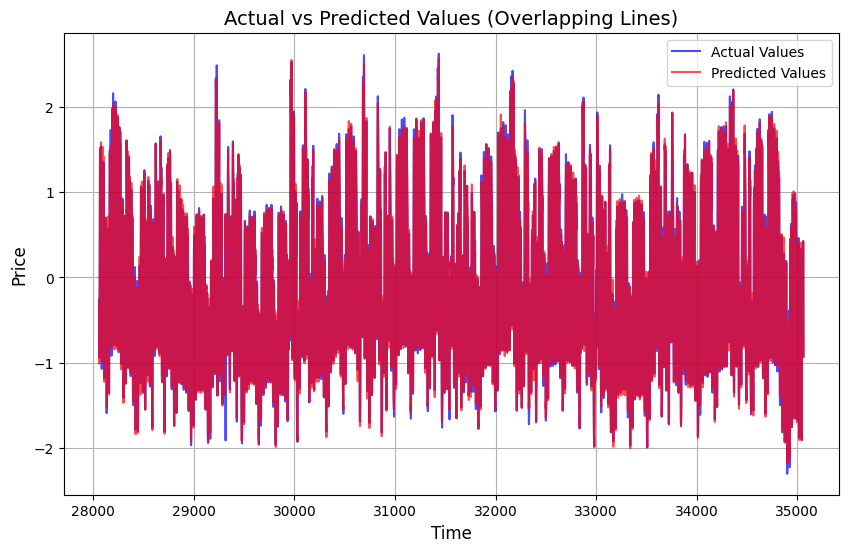

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Plot of Actual vs Predicted values
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(y_test.index, y_test, label='Actual Values', color='blue', alpha=0.7)

# Plot predicted values
plt.plot(y_test.index, y_pred, label='Predicted Values', color='red', alpha=0.7)

# Add title and labels
plt.title('Actual vs Predicted Values (Overlapping Lines)', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()




In [21]:
from sklearn.metrics import r2_score

# Calculate R² score for the model
r2 = r2_score(y_test, y_pred)

# Print the R² score
print(f'R-squared (R²) Score: {r2}')


R-squared (R²) Score: 0.9942780029263171


In [22]:
# Check available variables
globals().keys()


dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '__', '___', '_i', '_ii', '_iii', '_i1', 'XGBRegressor', 'mean_absolute_error', 'mean_squared_error', 'r2_score', 'xgb_model', '_i2', '_i3', 'pd', 'drive', 'energy_data', 'weather_data', 'weather_df', 'energy_df', '_i4', '_i5', '_i6', '_i7', '_i8', '_exit_code', 'StandardScaler', 'scaler', '_i9', '_i10', '_i11', '_i12', 'plt', 'sns', 'np', 'num_cols', 'num_rows', 'i', 'col', '_i13', 'train_size', 'train_data', 'test_data', '_i14', '_i15', 'selected_cols', '_i16', '_i17', '_i18', '_i19', 'X_train', 'y_train', 'X_test', 'y_test', 'RandomForestRegressor', 'rf_model', 'y_pred', 'mae', 'mse', 'r2', '_i20', '_i21', '_i22'])

In [24]:
# Assuming 'rf_model', 'scaler', and 'energy_df' are already defined from previous code

# Create a copy of the last row of the training data
last_row = energy_df.iloc[-1].copy()

# Create an empty list to store the next month's predictions
next_month_predictions = []

# Loop to simulate predictions for each hour of the next month
for i in range(1, 721):  # Assuming 30 days in a month, 24 hours per day
    # Update time-based features for the next hour
    last_row['time'] = last_row['time'] + pd.Timedelta(hours=1)
    last_row['hour'] = last_row['time'].hour
    last_row['day_of_week'] = last_row['time'].dayofweek
    last_row['month'] = last_row['time'].month

    # Update lag features using the previous predicted values
    last_row['demand_lag_1'] = last_row['total load actual']
    # Fix: Check if the list has enough elements before accessing index -24
    last_row['demand_lag_24'] = last_row['total load actual'] if i < 24 else next_month_predictions[-24] if len(next_month_predictions) >= 24 else last_row['total load actual']
    # ... (update other lag features similarly)

    # Update rolling average if necessary (more complex)
    # ...

    # Prepare the input features for the model
    input_features = last_row.drop(['time', 'total load actual', 'price actual']).values.reshape(1, -1)

    # Make prediction
    predicted_demand = rf_model.predict(input_features)[0]

    # Inverse scaling
    predicted_demand = scaler.inverse_transform([[predicted_demand, 0]])[0, 0]

    # Store the prediction and update the last_row values with this prediction
    next_month_predictions.append(predicted_demand)
    last_row['total load actual'] = predicted_demand  # Update last_row


# Create a DataFrame for next month's predictions
next_month_df = pd.DataFrame({'predicted_demand': next_month_predictions})


# Output the next month's predictions (or store it in a file)
next_month_df

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does

,predicted_demand
0,24245.56
1,24357.33
2,24366.51
3,24358.03
4,24369.50
...,...
715,24364.54
716,24357.39
717,24357.39
718,24346.07


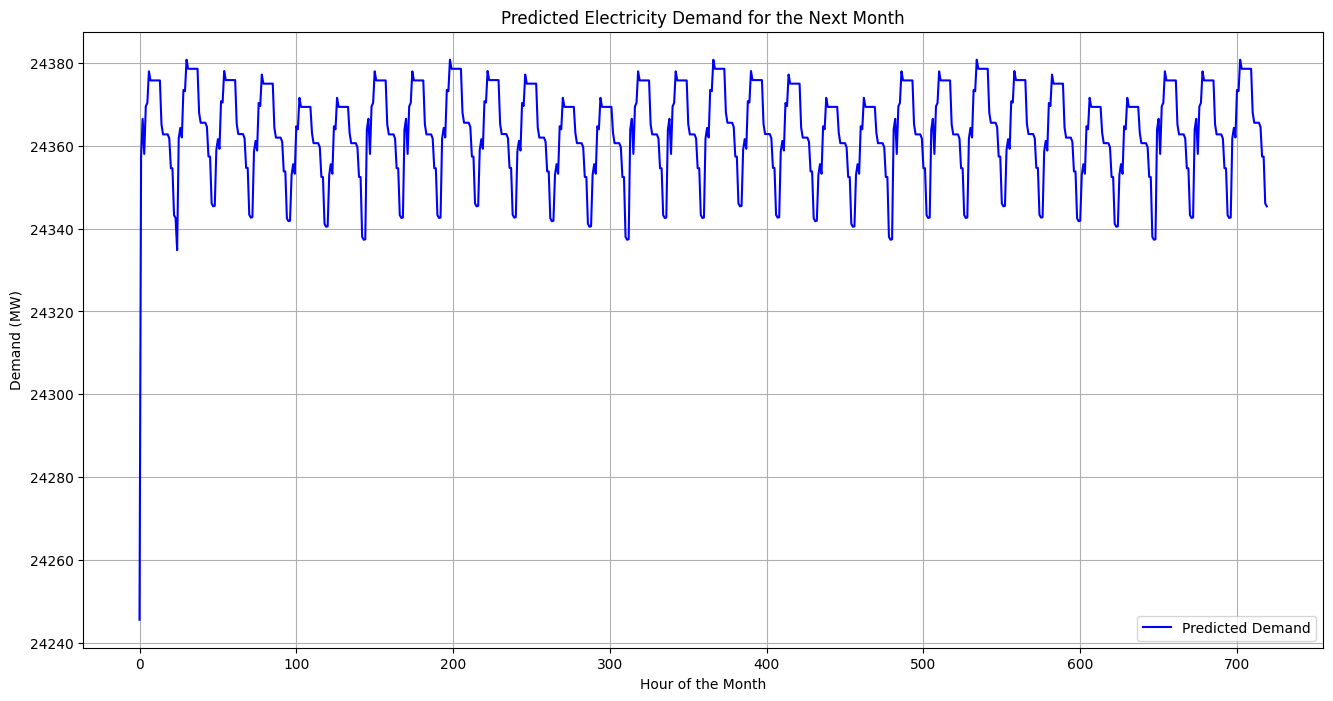

In [25]:
import matplotlib.pyplot as plt

# Create a DataFrame for next month's predictions (this part is from your code)
next_month_df = pd.DataFrame({'predicted_demand': next_month_predictions})

# Increase the figure size for better visibility
plt.figure(figsize=(16, 8))  # Adjust the width and height as needed

# Plot the predicted demand for the next month
plt.plot(next_month_df['predicted_demand'], label='Predicted Demand', color='blue')

# Add labels and title
plt.title('Predicted Electricity Demand for the Next Month')
plt.xlabel('Hour of the Month')
plt.ylabel('Demand (MW)')

# Show the grid for better readability
plt.grid(True)

# Display the plot
plt.legend()
plt.show()


In [26]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the XGBoost regressor
xgb_model = XGBRegressor(
    n_estimators=100,        # Number of trees
    learning_rate=0.1,       # Step size shrinkage
    max_depth=6,             # Maximum tree depth
    subsample=0.8,           # Subsampling ratio for training
    colsample_bytree=0.8,    # Subsampling ratio of columns per tree
    random_state=42          # For reproducibility
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Display the results
print(f"XGBoost Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"R-squared (R²): {r2_xgb}")


XGBoost Model Performance:
Mean Absolute Error (MAE): 0.051302981863773606
Mean Squared Error (MSE): 0.005160846527187979
R-squared (R²): 0.994708475515614


XGBoost Model Performance:
Mean Absolute Error (MAE): 0.051302981863773606
Mean Squared Error (MSE): 0.005160846527187979
R-squared (R²): 0.994708475515614


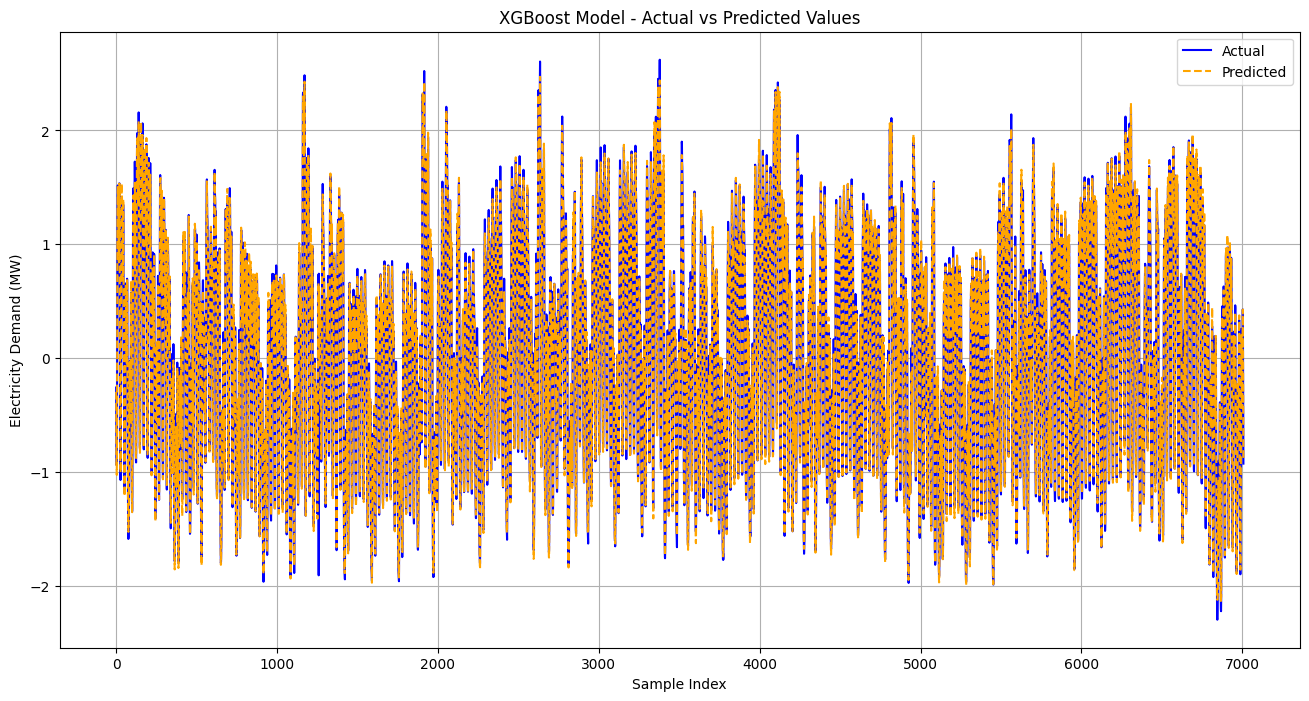

In [27]:
print(f"XGBoost Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"R-squared (R²): {r2_xgb}")

# Plot actual vs. predicted values for the test set
plt.figure(figsize=(16, 8))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred_xgb, label='Predicted', color='orange', linestyle='dashed')
plt.title('XGBoost Model - Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Electricity Demand (MW)')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

# Remove or transform the 'time' column in the training and testing datasets
X_train_price['hour'] = X_train_price['time'].dt.hour
X_train_price['day_of_week'] = X_train_price['time'].dt.dayofweek
X_train_price['month'] = X_train_price['time'].dt.month
X_train_price = X_train_price.drop(columns=['time'], errors='ignore')

X_test_price['hour'] = X_test_price['time'].dt.hour
X_test_price['day_of_week'] = X_test_price['time'].dt.dayofweek
X_test_price['month'] = X_test_price['time'].dt.month
X_test_price = X_test_price.drop(columns=['time'], errors='ignore')

# Initialize and train the XGBoost model
xgb_model_price = xgb.XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
xgb_model_price.fit(X_train_price, y_train_price)

# Make predictions
y_pred_price_xgb = xgb_model_price.predict(X_test_price)

# Evaluate the model
mae_price_xgb = mean_absolute_error(y_test_price, y_pred_price_xgb)
mse_price_xgb = mean_squared_error(y_test_price, y_pred_price_xgb)
r2_price_xgb = r2_score(y_test_price, y_pred_price_xgb)

# Print the performance metrics
print(f"XGBoost Model Performance for Price Forecasting:")
print(f"Mean Absolute Error (MAE): {mae_price_xgb}")
print(f"Mean Squared Error (MSE): {mse_price_xgb}")
print(f"R-squared (R²): {r2_price_xgb}")


XGBoost Model Performance for Price Forecasting:
Mean Absolute Error (MAE): 0.5640587135799863
Mean Squared Error (MSE): 0.5400858317781766
R-squared (R²): 0.18641775400886207


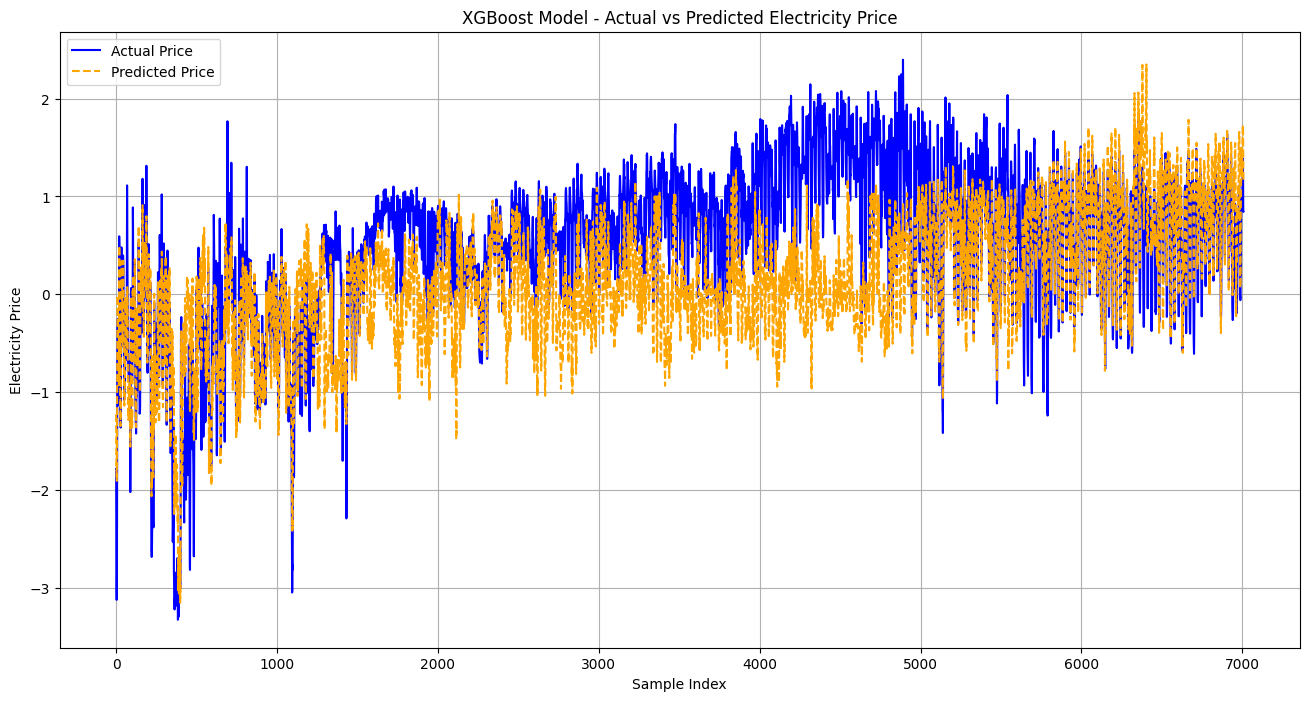

In [37]:
# Plot the actual vs. predicted values
plt.figure(figsize=(16, 8))
plt.plot(y_test_price.values, label='Actual Price', color='blue')
plt.plot(y_pred_price_xgb, label='Predicted Price', color='orange', linestyle='dashed')
plt.title('XGBoost Model - Actual vs Predicted Electricity Price')
plt.xlabel('Sample Index')
plt.ylabel('Electricity Price')
plt.legend()
plt.grid(True)
plt.show()